In [7]:
# import packages
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import pickle
import time
import cv2
import os

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths

In [8]:
# path to the images
data_path = 'data'

images = []
image_labels = []

# get the image paths inside the `data` directory
image_paths = sorted(list(paths.list_images(data_path)))
# for reproducability
random.seed(42)
# shuffle the images
random.shuffle(image_paths)

In [9]:
for image_path in image_paths:
    # load and resize the images
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    images.append(image)
    
    # get the labels from the image paths and store in `image_labels`
    image_label = image_path.split(os.path.sep)[-2]
    image_labels.append(image_label)

In [10]:
# rescale the image pixels 
images = np.array(images, dtype='float') / 255.0
print(images.shape)
# make `image_labels` as array
image_labels = np.array(image_labels)
print(image_labels)

(1100, 128, 128, 3)
['golden' 'white' 'golden' ... 'puma' 'golden' 'golden']


In [9]:
# divide the image data into train set and test set
(train_X, test_X, train_y, test_y) = train_test_split(images, image_labels, 
                                                      test_size=0.2, 
                                                      random_state=42)

In [10]:
# one-hot encode the labels
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

print(train_y)
print(test_y)

[[1 0 0]
 [0 0 1]
 [0 1 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
[[0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 

In [12]:
# generator for image augmentation
image_aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30, shear_range=0.2, 
    zoom_range=0.2, height_shift_range=0.2, width_shift_range=0.2, 
    horizontal_flip=True, fill_mode='nearest')

In [13]:
# initialize the model
model = tf.keras.models.Sequential()
input_shape = (128, 128, 3)

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', 
            activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization(axis=-1))      
model.add(tf.keras.layers.MaxPooli32x32ng2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
        
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization(axis=-1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(len(lb.classes_), activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [61]:
NAME = 'mnist-{}'.format(int(time.time())) # to save different tensorboard logs each time
 
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [63]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
              metrics=['accuracy'])

history = model.fit_generator(image_aug.flow(train_X, train_y, 
                                             batch_size=32), 
                              validation_data=(test_X, test_y), 
                              steps_per_epoch=len(train_X) // 32, 
                              epochs=50, callbacks=[tensorboard])

Epoch 1/50
28/28 [==============================] - 4s 145ms/step - loss: 0.4763 - acc: 0.8330 - val_loss: 0.9249 - val_acc: 0.6636
Epoch 2/50
28/28 [==============================] - 3s 99ms/step - loss: 0.3884 - acc: 0.8602 - val_loss: 0.7565 - val_acc: 0.7636
Epoch 3/50
28/28 [==============================] - 3s 109ms/step - loss: 0.3525 - acc: 0.8727 - val_loss: 1.8761 - val_acc: 0.6091
Epoch 4/50
28/28 [==============================] - 3s 102ms/step - loss: 0.3960 - acc: 0.8511 - val_loss: 0.2426 - val_acc: 0.9091
Epoch 5/50
28/28 [==============================] - 3s 125ms/step - loss: 0.3433 - acc: 0.8739 - val_loss: 0.7348 - val_acc: 0.7045
Epoch 6/50
28/28 [==============================] - 3s 98ms/step - loss: 0.3328 - acc: 0.8932 - val_loss: 0.9573 - val_acc: 0.7545
Epoch 7/50
28/28 [==============================] - 3s 107ms/step - loss: 0.3579 - acc: 0.8693 - val_loss: 0.9428 - val_acc: 0.6864
Epoch 8/50
28/28 [==============================] - 3s 121ms/step - loss: 0.36

Epoch 38/50
28/28 [==============================] - 3s 117ms/step - loss: 0.2529 - acc: 0.9080 - val_loss: 0.2323 - val_acc: 0.9409
Epoch 39/50
28/28 [==============================] - 3s 111ms/step - loss: 0.2398 - acc: 0.9159 - val_loss: 0.2979 - val_acc: 0.9136
Epoch 40/50
28/28 [==============================] - 4s 133ms/step - loss: 0.2665 - acc: 0.9023 - val_loss: 0.4116 - val_acc: 0.8591
Epoch 41/50
28/28 [==============================] - 3s 113ms/step - loss: 0.3174 - acc: 0.8773 - val_loss: 0.3861 - val_acc: 0.8727
Epoch 42/50
28/28 [==============================] - 3s 107ms/step - loss: 0.2097 - acc: 0.9341 - val_loss: 0.2783 - val_acc: 0.9182
Epoch 43/50
28/28 [==============================] - 3s 116ms/step - loss: 0.3316 - acc: 0.8818 - val_loss: 2.1584 - val_acc: 0.4636
Epoch 44/50
28/28 [==============================] - 3s 110ms/step - loss: 0.2852 - acc: 0.8955 - val_loss: 1.7302 - val_acc: 0.7136
Epoch 45/50
28/28 [==============================] - 4s 130ms/step - 

## Plot

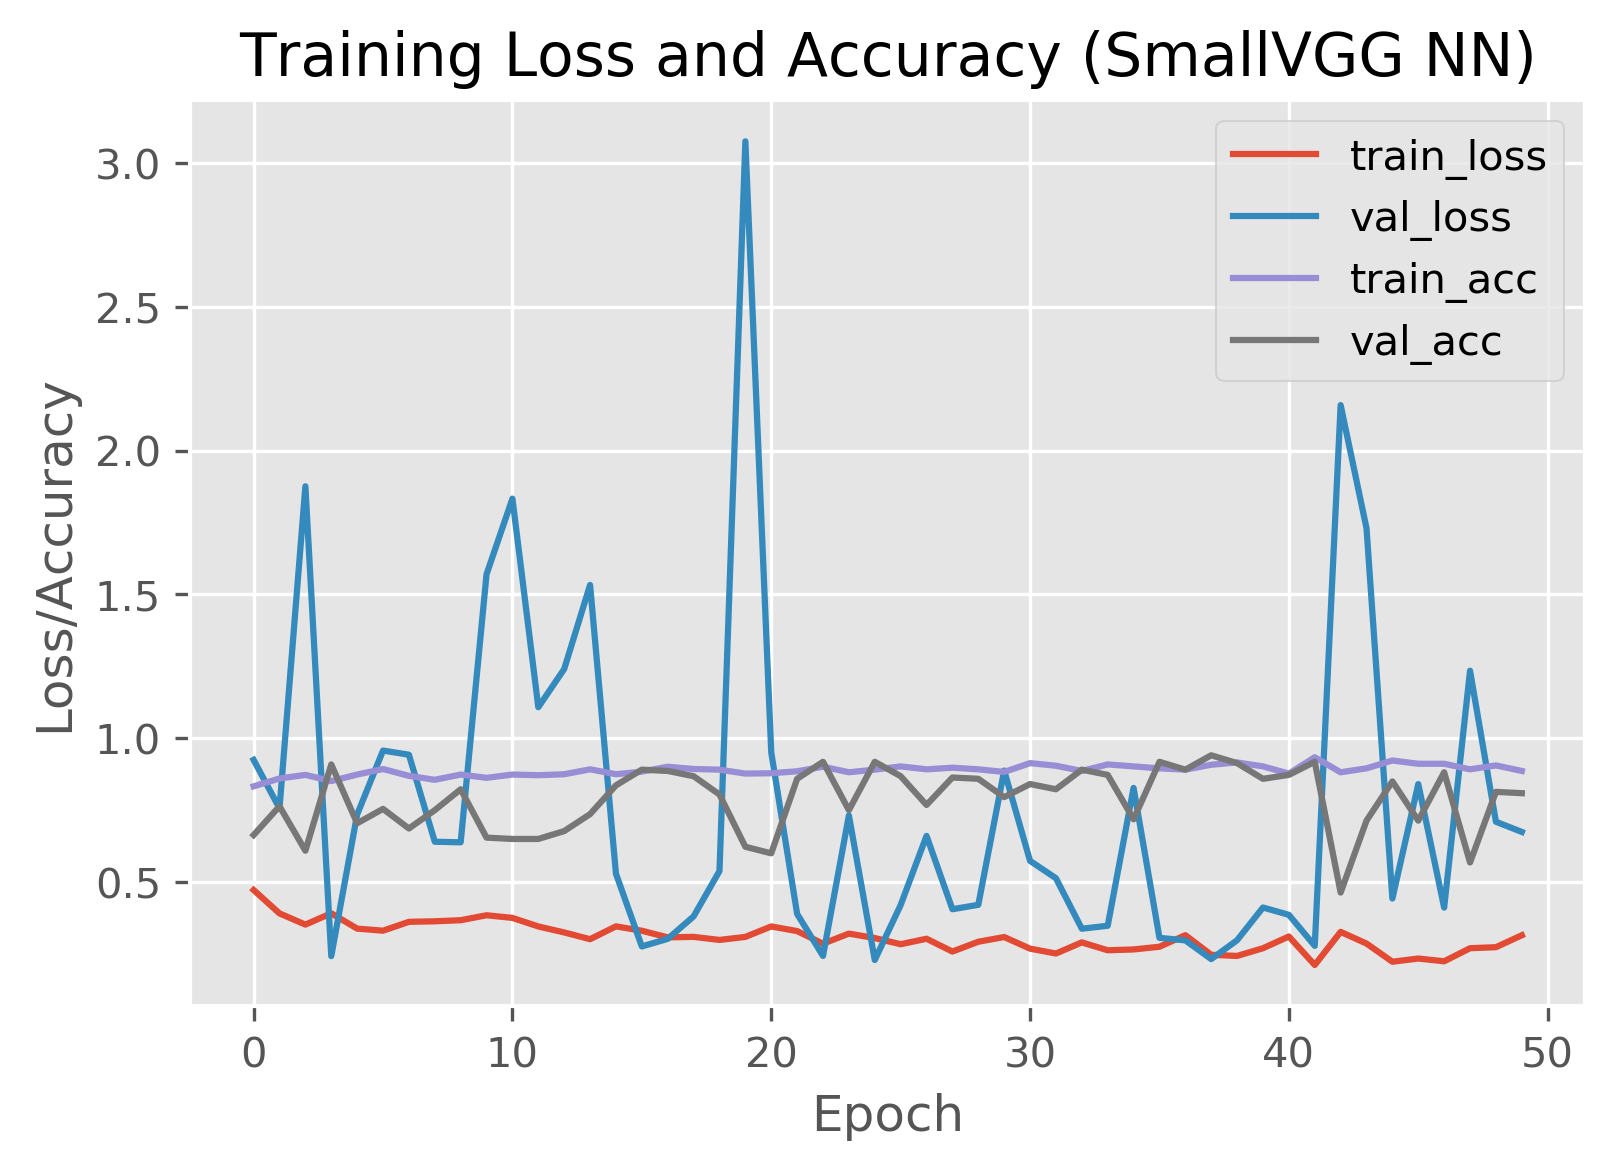

In [64]:
num_epochs = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure(dpi=300)
plt.plot(num_epochs, history.history['loss'], label='train_loss')
plt.plot(num_epochs, history.history['val_loss'], 
    label='val_loss')
plt.plot(num_epochs, history.history['acc'], label='train_acc')
plt.plot(num_epochs, history.history['val_acc'], 
    label='val_acc')
plt.title('Training Loss and Accuracy (SmallVGG NN)')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.savefig('smallvgg.png')

## Saving Model

In [65]:
model.save('conv2d.model')
f = open('conv2d_lb.pickle', 'wb')
f.write(pickle.dumps(lb))
f.close()

## Predicting

In [85]:
# load the test image
image = cv2.imread('images/golden.jpg')
output = image.copy()
image = cv2.resize(image, (128, 128))

In [86]:
# scale the pixels
image = image.astype('float') / 255.0

In [87]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [88]:
model = tf.keras.models.load_model('conv2d.model')
lb = pickle.loads(open('conv2d_lb.pickle', 'rb').read())

In [89]:
# predict
preds = model.predict(image)

In [90]:
# get the class label
i = preds.argmax(axis=1)[0]
print('PREDICTIONS: \n', preds)
print('PREDICTION ARGMAX: ', i)
label = lb.classes_[i]

PREDICTIONS: 
 [[2.5478221e-04 9.8686826e-01 1.2876963e-02]]
PREDICTION ARGMAX:  1


In [93]:
# draw the class label on the image
text = '{}: {:.2f}%'.format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

array([[[ 36,  93, 119],
        [ 58, 120, 138],
        [ 52, 106, 123],
        ...,
        [ 15,   5,  17],
        [ 16,   4,  16],
        [ 19,   6,  20]],

       [[ 27,  93, 112],
        [ 65, 121, 138],
        [ 44,  84, 103],
        ...,
        [  5,   1,  12],
        [ 21,  17,  28],
        [ 12,   6,  17]],

       [[ 38, 103, 124],
        [ 41,  92, 112],
        [ 36,  64,  88],
        ...,
        [  6,   8,  16],
        [ 13,  14,  24],
        [  2,   3,  13]],

       ...,

       [[115, 159, 212],
        [112, 161, 201],
        [113, 165, 195],
        ...,
        [224, 213, 215],
        [229, 216, 218],
        [223, 210, 212]],

       [[102, 149, 200],
        [ 98, 149, 189],
        [111, 163, 193],
        ...,
        [224, 211, 213],
        [228, 214, 216],
        [229, 215, 217]],

       [[110, 157, 208],
        [ 95, 143, 185],
        [100, 151, 184],
        ...,
        [223, 210, 212],
        [231, 217, 219],
        [239, 222, 226]]

In [94]:
# show the image
cv2.imshow('image', output)
cv2.waitKey(0)

-1